# Código Parkinsons
# Speech Dataset with Multiple Types of Sound Recordings Data Set
 - Leitura do dado
 - Geração de Histogramas
 - Correlação
 - Dados escalonados

In [1]:
# Bibliotecas do Pyhton
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sb
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm  
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Data/Parkinson_00.csv')
df.columns

Index(['ID;Jitter_local;Jitter_local_absolute;Jitter_rap;Jitter_ppq5;Jitter_ddp;Shimmer_local;Shimmer_local_dB;Shimmer_apq3;Shimmer_apq5; Shimmer_apq11;Shimmer_dda;AC;NTH;HTN;Median_pitch;Mean_pitch;Standard_deviation;Minimum_pitch;Maximum_pitch;Number_of_pulses;Number_of_periods;Mean_period;Standard_deviation_of_period; Fraction_of_locally_unvoiced_frames;Number_of_voice_breaks;Degree_of_voice_breaks;UPDRS ;class_information'], dtype='object')

In [3]:
#Importando os dados e escrevendo os atributos
import pandas
url="Data/train_data.txt"
names=['ID','Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
       'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11', 
       'Shimmer_dda','AC','NTH','HTN','Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch',
       'Maximum_pitch','Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
       'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks','UPDRS','Target'] 

data=pandas.read_csv(url,names=names)
data=data.drop(['ID','UPDRS'],axis=1)  # Removendo essas duas colunas.

data.sort_values('Target',axis=0,inplace = True)
array = data.values

X = array[:,0:26]    # features 0-27 (0 - (28-1))
Y = array[:,26]      # target
X.shape

(1040, 26)

In [4]:
data.head()

,Jitter_local,Jitter_local_absolute,Jitter_rap,Jitter_ppq5,Jitter_ddp,Shimmer_local,Shimmer_local_dB,Shimmer_apq3,Shimmer_apq5,Shimmer_apq11,...,Minimum_pitch,Maximum_pitch,Number_of_pulses,Number_of_periods,Mean_period,Standard_deviation_of_period,Fraction_of_locally_unvoiced_frames,Number_of_voice_breaks,Degree_of_voice_breaks,Target
1039,1.809,0.000149,0.680,0.843,2.040,7.881,0.782,2.690,4.543,11.073000,...,108.144,137.546,62,60,0.008211,0.000566,18.182,1,3.387,0
684,2.949,0.000290,1.501,1.194,4.504,9.554,0.952,4.222,5.296,7.838000,...,89.905,120.236,36,34,0.009845,0.000710,37.500,1,23.093,0
685,2.351,0.000241,1.093,1.168,3.279,10.927,1.006,3.626,5.300,12.472000,...,86.120,106.528,42,41,0.010235,0.000477,34.921,0,0.000,0
686,5.354,0.000543,2.487,1.384,7.460,14.281,1.344,6.479,2.851,11.392318,...,85.894,101.872,16,14,0.010143,0.000850,77.612,1,18.796,0
687,3.104,0.000269,1.371,0.973,4.112,16.280,1.484,5.560,9.478,14.428000,...,99.697,140.024,27,25,0.008663,0.001097,45.238,1,30.963,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
mini = 0    
maxi = 1
scaler = MinMaxScaler(feature_range=(mini, maxi))
min_max_X = scaler.fit_transform(X)

# Gerando Histogramas


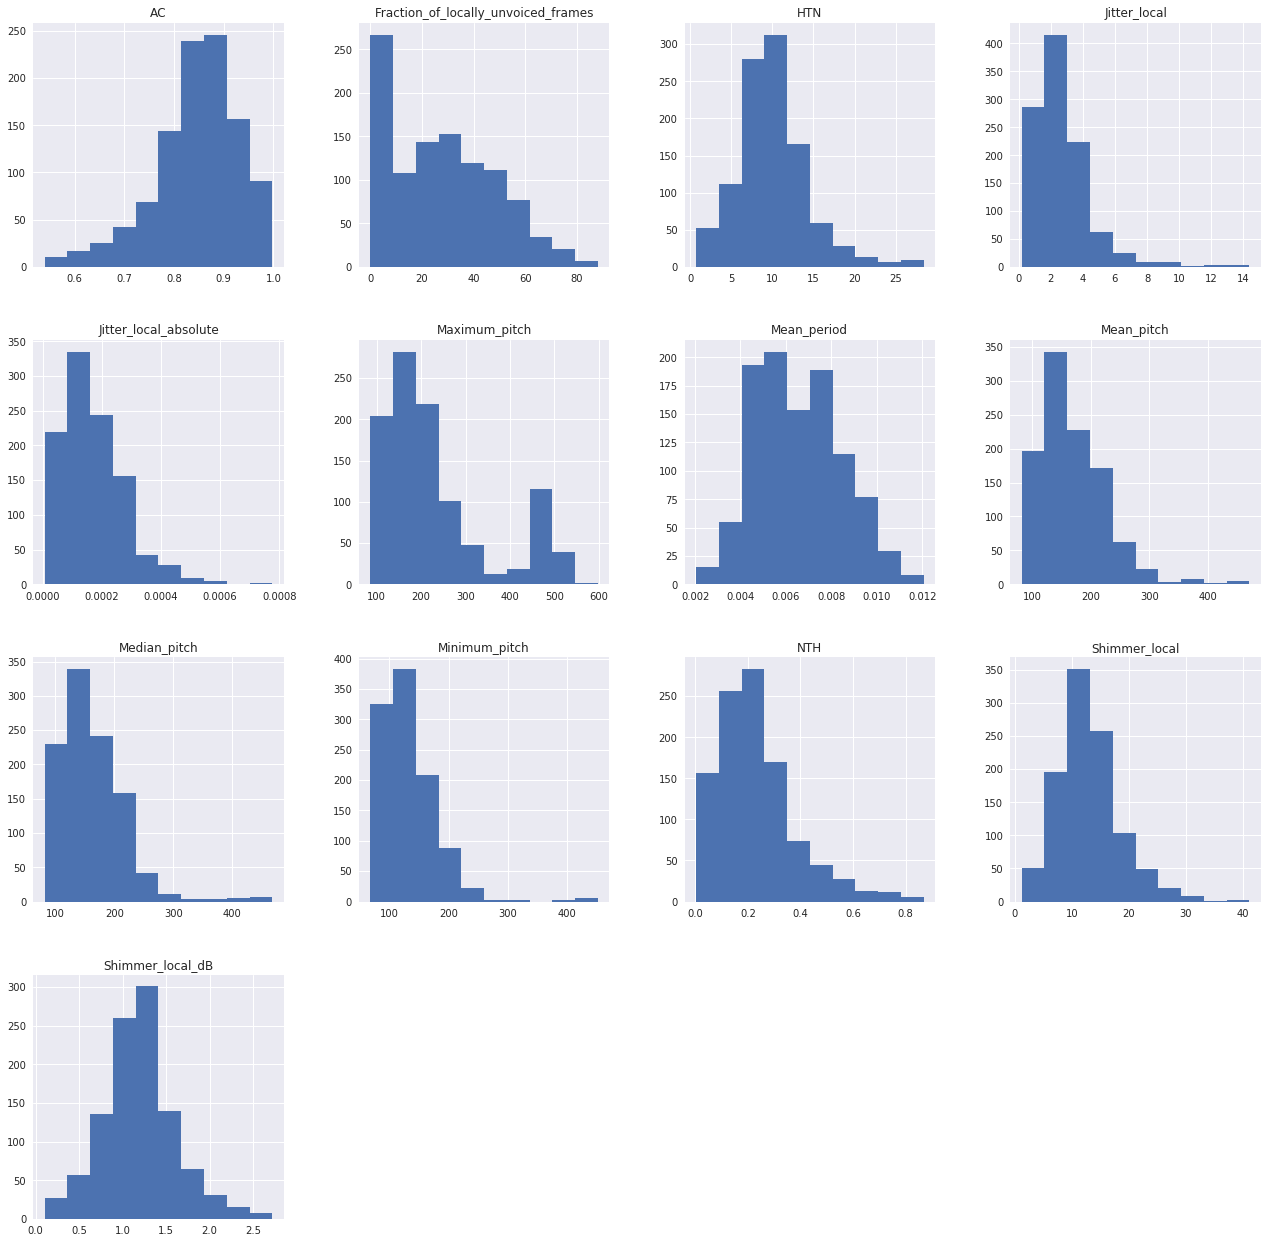

In [6]:
# data.hist(['Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
#        'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11', 
#        'Shimmer_dda','AC','NTH','HTN','Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch',
#        'Maximum_pitch','Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
#        'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks'],figsize = (22,22))
# plt.show()

data.hist(['Jitter_local','Jitter_local_absolute',
       'Shimmer_local','Shimmer_local_dB','AC','NTH','HTN','Median_pitch','Mean_pitch','Minimum_pitch',
       'Maximum_pitch','Mean_period',
       'Fraction_of_locally_unvoiced_frames'],figsize = (22,22))
plt.show()

# Empregando o Numpy

In [7]:
print("Media")
print(np.mean(X,axis=0))
print("Desvio")
print(np.std(X,axis=0))
print("Mínimo")
print(np.min(X,axis=0))
print("Percentil 25")
print(np.percentile(X, 25, axis=0))
print("Percentil 50")
print(np.percentile(X, 50, axis=0))
print("Percentil 75")
print(np.percentile(X, 75, axis=0))
print("Máximo")
print(np.max(X,axis=0))

Media
[2.67952269e+00 1.70397976e-04 1.24705285e+00 1.34832712e+00
 3.74116138e+00 1.29183906e+01 1.19489523e+00 5.69960027e+00
 7.98355191e+00 1.22153455e+01 1.70988390e+01 8.46013390e-01
 2.31378569e-01 9.99954169e+00 1.63368286e+02 1.68727621e+02
 2.75476293e+01 1.34538101e+02 2.34875990e+02 1.09744231e+02
 1.05969231e+02 6.54660833e-03 8.42529070e-04 2.76828558e+01
 1.13461538e+00 1.23700423e+01]
Desvio
[1.76420375e+00 1.06403038e-04 9.78991021e-01 1.13819436e+00
 2.93702983e+00 5.44958211e+00 4.19868791e-01 3.01373263e+00
 4.83856404e+00 6.01336779e+00 9.04118729e+00 8.56677794e-02
 1.51210270e-01 4.28924040e+00 5.59947380e+01 5.59429977e+01
 3.66549887e+01 4.70354288e+01 1.21482795e+02 1.49955557e+02
 1.49345222e+02 1.87441160e-03 7.22721334e-04 2.09652075e+01
 1.61398749e+00 1.51546249e+01]
Mínimo
[1.900000e-01 6.495000e-06 6.200000e-02 8.100000e-02 1.850000e-01
 1.185000e+00 1.030000e-01 4.960000e-01 7.080000e-01 5.170000e-01
 1.488000e+00 5.395660e-01 2.106000e-03 6.950000e-01

In [8]:
# from sklearn.preprocessing import MinMaxScaler
# mini = 0
# maxi = 1
# scaler = MinMaxScaler(feature_range=(mini, maxi)) #
# min_max_X = scaler.fit_transform(X)
# np.set_printoptions(precision=3)
# print("Dados originais")
# print(X[0:5,:])
# print("Dados escalados") #
# print(min_max_X[0:5,:])

# Correlação

In [9]:
import pandas as pd
columns=['Jitter_local','Jitter_local_absolute','Jitter_rap','Jitter_ppq5','Jitter_ddp',
       'Shimmer_local','Shimmer_local_dB','Shimmer_apq3','Shimmer_apq5', 'Shimmer_apq11', 
       'Shimmer_dda','AC','NTH','HTN','Median_pitch','Mean_pitch','Standard_deviation','Minimum_pitch',
       'Maximum_pitch','Number_of_pulses','Number_of_periods','Mean_period','Standard_deviation_of_period',
       'Fraction_of_locally_unvoiced_frames','Number_of_voice_breaks','Degree_of_voice_breaks']
df=pd.DataFrame(data, columns=columns)

In [10]:
corre=df.corr()

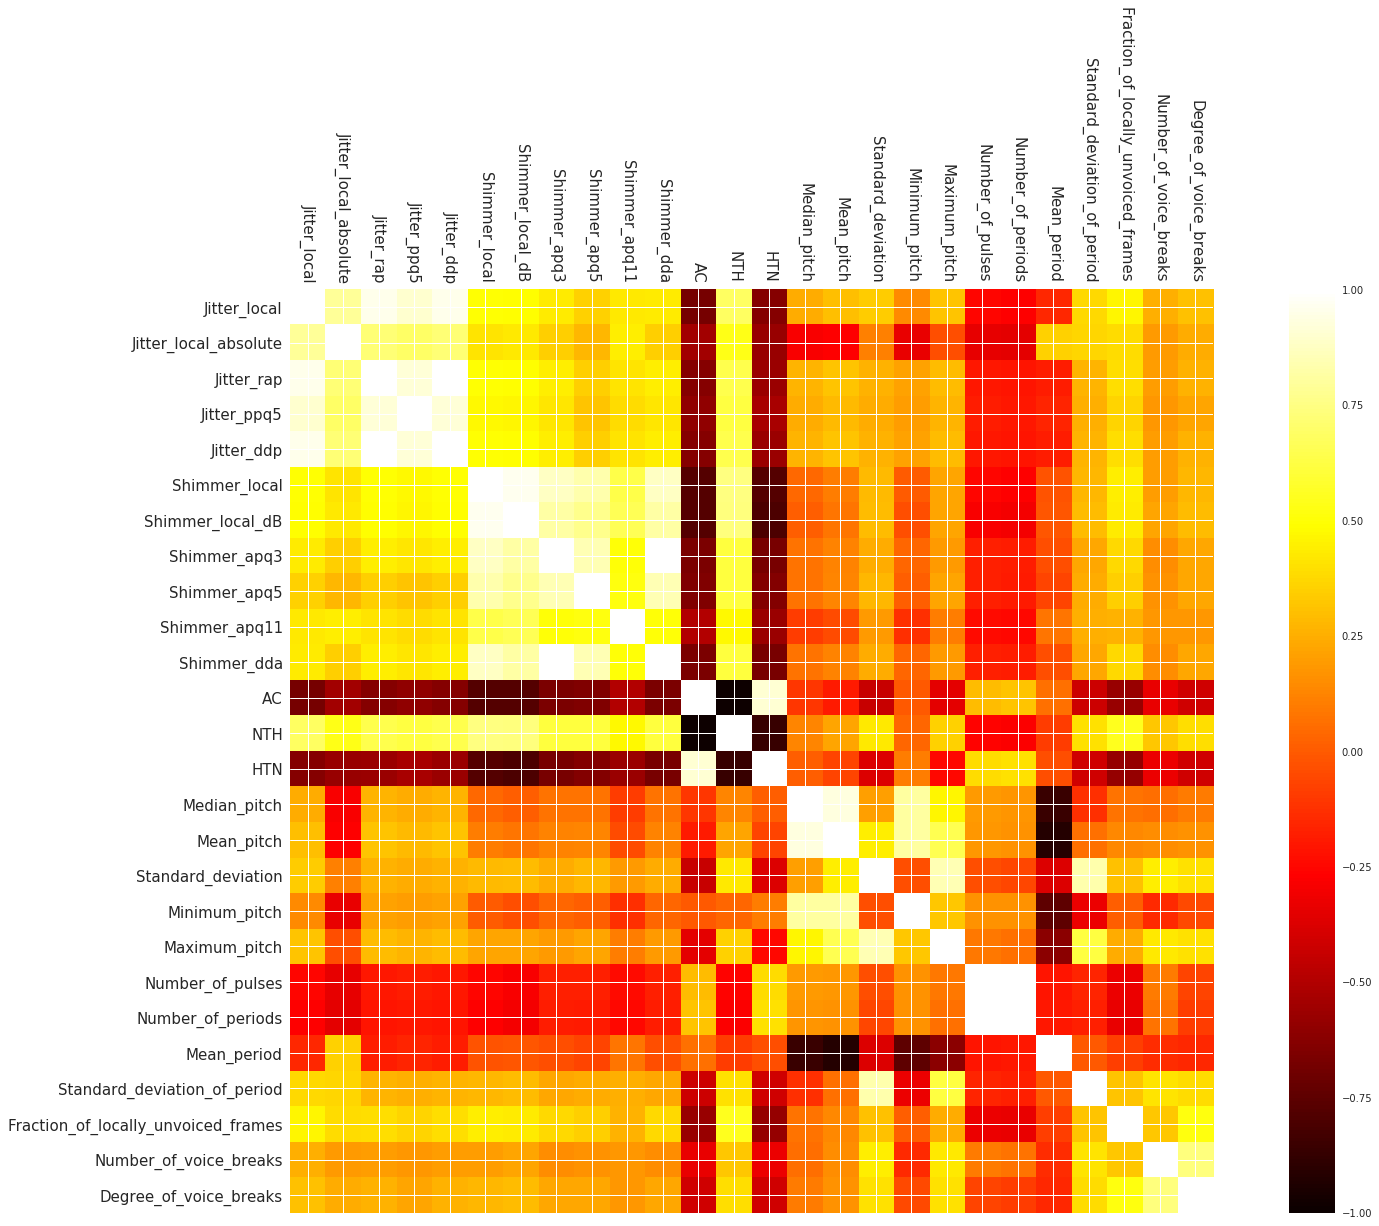

In [11]:
import matplotlib.pyplot
import numpy

fig=plt.figure(figsize = (27,27))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.6)
cax=ax.matshow(corre, vmin=-1, vmax=1,  cmap='hot')
fig.colorbar(cax)
ticks = numpy.arange(0,26,1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns, rotation='270', size='15')
ax.set_yticklabels(columns, size='15')
plt.show()

# Normalização

In [12]:
from sklearn.preprocessing import MinMaxScaler
mini = 0
maxi = 1
scaler = MinMaxScaler(feature_range=(mini, maxi))
min_max_X = scaler.fit_transform(X)  # para o teste nao podemos usar o fit, vai ficar scaler.transform
np.set_printoptions(precision=3)
print("Dados originais")
print(X[0:1,:])
print("Dados escalados")
print(min_max_X[0:1,:])

Dados originais
[[1.809e+00 1.485e-04 6.800e-01 8.430e-01 2.040e+00 7.881e+00 7.820e-01
  2.690e+00 4.543e+00 1.107e+01 8.069e+00 9.256e-01 9.748e-02 1.347e+01
  1.193e+02 1.216e+02 8.028e+00 1.081e+02 1.375e+02 6.200e+01 6.000e+01
  8.211e-03 5.658e-04 1.818e+01 1.000e+00 3.387e+00]]
Dados escalados
[[0.114 0.184 0.078 0.057 0.078 0.168 0.259 0.087 0.053 0.239 0.087 0.842
  0.11  0.461 0.098 0.101 0.026 0.105 0.101 0.042 0.04  0.615 0.081 0.206
  0.083 0.049]]


# Matriz de Distância sem a remoção de outliers

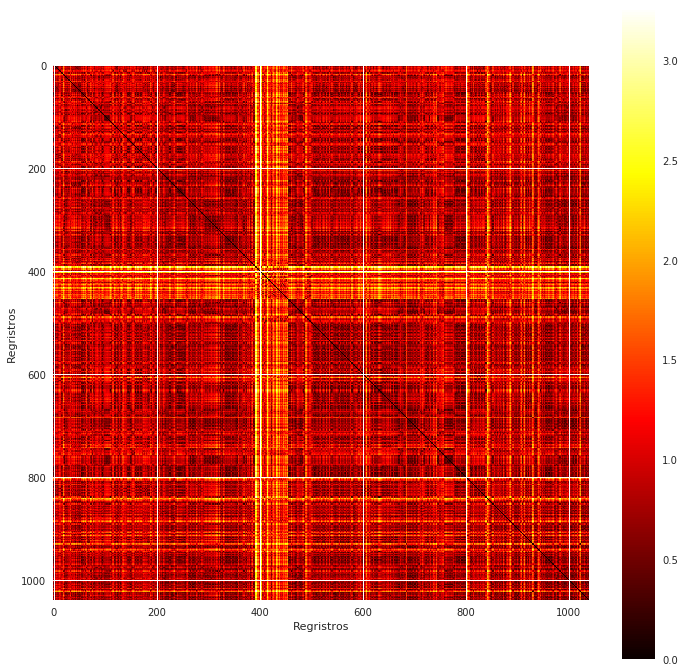

In [13]:
from scipy.spatial.distance import cdist
dist_matrix=cdist(min_max_X, min_max_X, metric='euclidean')

plt.figure(figsize=(12, 12))
plt.imshow(dist_matrix, cmap='hot', interpolation='none')  
plt.colorbar()  
#plt.xticks(range(len(b)))  
#plt.yticks(range(len(b)));
plt.xlabel("Regristros")
plt.ylabel("Regristros")
plt.show()

In [14]:
from scipy.spatial.distance import cdist
dist_matrix=cdist(X, X, metric='euclidean')

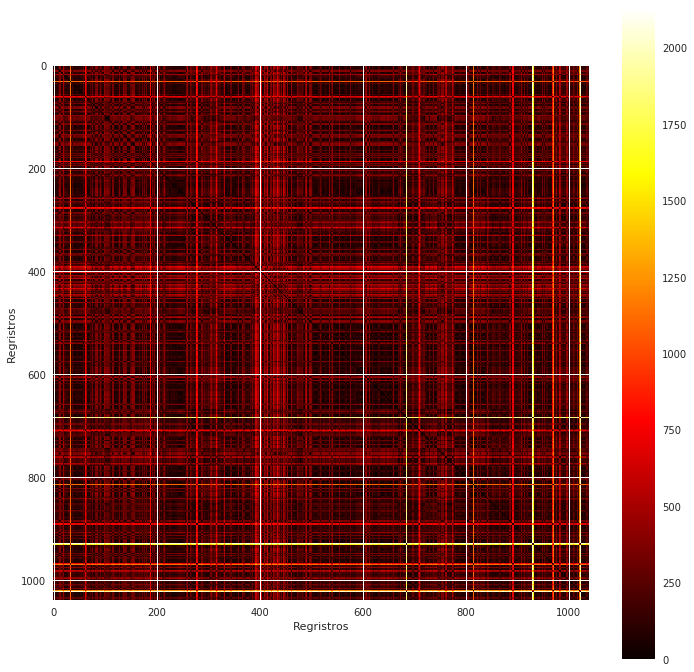

In [15]:
plt.figure(figsize=(12, 12))
plt.imshow(dist_matrix, cmap='hot', interpolation='none')  
plt.colorbar()  
#plt.xticks(range(len(b)))  
#plt.yticks(range(len(b)));
plt.xlabel("Regristros")
plt.ylabel("Regristros")
plt.show()

# Outliers baseada nas Distâncias

In [16]:
def mean3std(X):
    mean_std=(X-np.mean(X,axis=0))/(3*np.std(X, axis=0))
    return mean_std

In [17]:
mean_std_X1=mean3std(X)

In [18]:
dist_matrix1=cdist(mean_std_X1, mean_std_X1, metric='euclidean')

In [19]:
mean_dif=np.mean(dist_matrix1,axis=0)

In [20]:
mean_dif_sort=np.sort(mean_dif)
indi = np.transpose(np.arange(0,1024))
#indi

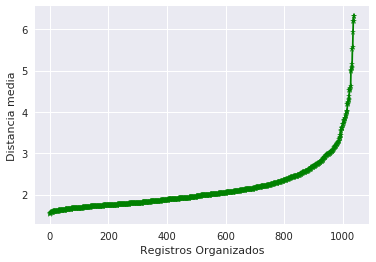

In [21]:
plt.plot(mean_dif_sort, c="g", alpha=1, marker="*",  ls= '-') 
plt.xlabel("Registros Organizados")
plt.ylabel("Distancia media")
plt.show()

In [22]:
limit = 4  # maiores deste valor são considerados outliers
outliers=np.where(mean_dif>limit)# posições dos registros considerados Outliers

print('')
print('=>Os valores OUTLIERS')
outliers


=>Os valores OUTLIERS


(array([  31,  391,  392,  393,  394,  404,  416,  419,  433,  435,  439,
         444,  446,  452,  608,  609,  685,  752,  804,  805,  807,  843,
         925,  930,  932, 1022, 1023]),)

In [23]:
# - Remoção dos valores OUTLIERS.

In [24]:
import numpy as np
index=[31,391,392,393,394,404,416,433,452,805,930,1023]

X = array[:,0:28]

X_out=np.delete(X, index, axis=0)
X_out.shape

(1028, 27)

# Análise de Componentes Principais (PCA)

- Em termos gerais a PCA busca reduzir o número de dimensões de um set de dados. Projetando os dados em um novo plano. Usando essa nova projeção os dados originais, que podem envolver diversas variáveis, podem ser interpretados utilizando menos "dimensões."
- 

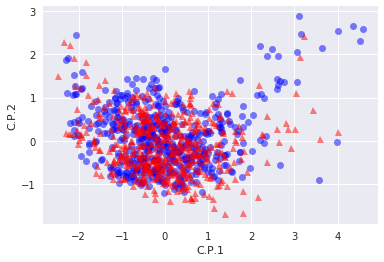

In [25]:
from sklearn.decomposition import PCA as sklearnPCA

mean_std_park=mean3std(X)
sklearn_pca = sklearnPCA(n_components=10)
Y_sklearn = sklearn_pca.fit_transform(mean_std_park)
plt.plot(Y_sklearn[Y==0,0], Y_sklearn[Y==0,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(Y_sklearn[Y==1,0], Y_sklearn[Y==1,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel("C.P.1")
plt.ylabel("C.P.2")
plt.show()

In [26]:
sklearn_pca.explained_variance_ratio_

array([0.39 , 0.166, 0.095, 0.089, 0.064, 0.044, 0.034, 0.022, 0.022,
       0.017])

In [27]:
# t-snet - plote de todas as componentes

In [28]:
# Para facilitar vamos criar um um novo DataFrame com os resultados do objeto PCA.

from pandas import DataFrame

loadings = DataFrame(Y_sklearn)
loadings.index = ['PC %s' % pc for pc in loadings.index + 1]
loadings.columns = ['TS %s' % pc for pc in loadings.columns + 1]

array = loadings.values
X_pca = array[:,0:11]    # 
Y=Y
#X_n.shape

# Cross Val e KNN
 - Estou com dúvidas a respeito dessa implementação

In [29]:
from sklearn.cross_validation import cross_val_score

/home/israel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
entradas= X_pca
saidas= Y

# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 20)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_pca, Y,  cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.976923076923077, 0.9673076923076922, 0.9749999999999999, 0.9721153846153845, 0.971153846153846, 0.973076923076923, 0.975, 0.9721153846153845, 0.973076923076923, 0.9701923076923077, 0.9701923076923075, 0.9663461538461536, 0.9692307692307691, 0.9682692307692307, 0.9673076923076923, 0.9625, 0.960576923076923, 0.9586538461538462, 0.9567307692307692]


In [31]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 19
Max of list 0.976923076923077


Text(0,0.5,'Cross-validated accuracy')

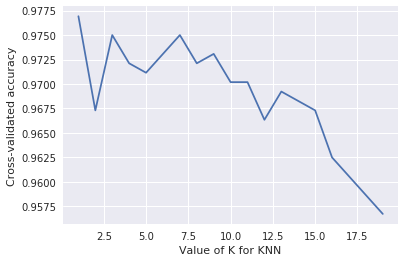

In [32]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_pred=cross_val_predict(knn, X_pca,Y,cv=10)
conf_mat=confusion_matrix(Y,y_pred)
conf_mat

array([[498,  22],
       [ 23, 497]])

# Naive Bayes

In [36]:
import numpy as np

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
model=GaussianNB()

In [39]:
#model.fit(X_pca, Y)

In [40]:
scores=cross_val_score(model, X_pca, Y, scoring='accuracy', cv=10)
print(scores)

[0.99  0.923 1.    1.    0.962 0.952 0.971 0.971 0.99  1.   ]


# SVM
- http://scikit-learn.org/stable/modules/svm.html
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- http://aprendis.gim.med.up.pt/index.php/Support_Vector_Machines


In [41]:
from sklearn import svm
import numpy as np

In [42]:
SVmodelo = svm.SVC( C=1, kernel = 'rbf')

In [43]:
scores=cross_val_score(SVmodelo, X_pca, Y,  scoring='accuracy', cv=10)
print(scores)

[0.99  1.    1.    1.    1.    0.981 1.    1.    1.    1.   ]


# Redes Neurais

In [44]:
from sklearn.neural_network import MLPClassifier

In [45]:
from sklearn import tree

In [46]:
ModeloArvore = tree.DecisionTreeClassifier()

In [47]:
scores = cross_val_score(ModeloArvore, X_pca, Y,  scoring='accuracy', cv=10)
print(scores)

[0.971 0.952 0.952 0.971 0.99  0.913 0.971 0.913 0.913 0.99 ]
